In [1]:
!date

Fri Feb 28 18:37:39 PST 2020


# TSS DE

In [1]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
import ast
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
#"Astro" : (0.9019607843137255,  0.3333333333333333,  0.050980392156862744),  # e6550d #reds
#"Endo" : (0.9921568627450981,  0.5529411764705883,  0.23529411764705882 ),  # fd8d3c
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 ET" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
#"L5/6 NP" : (0.6784313725490196,  0.28627450980392155, 0.2901960784313726 ),  # ad494a
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
#"Low Quality" : (0.5490196078431373,  0.42745098039215684, 0.19215686274509805),  # 8c6d31
#"SMC" : (0.7411764705882353,  0.6196078431372549,  0.2235294117647059 ),  # bd9e39
#"VLMC" : (0.9058823529411765,  0.7294117647058823,  0.3215686274509804 ),  # e7ba52
# (0.9058823529411765,  0.796078431372549,   0.5803921568627451 ),  # e7cb94
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
#"Pvalb" : (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  ),  # 756bb1
#(0.6196078431372549,  0.6039215686274509,  0.7843137254901961  ),  # 9e9ac8
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
#"Pvalb":(0.8549019607843137,  0.8549019607843137,  0.9215686274509803  ),  # dadaeb
}

In [3]:
isoform = anndata.read_h5ad("../cell_ranger_annotation/isoform.h5ad")
gene =    anndata.read_h5ad("../cell_ranger_annotation/gene.h5ad")

In [4]:
isoform = isoform[:,isoform.var.sort_values("gene_id").index]
gene = gene[:,gene.var.sort_values("gene_id").index]

In [5]:
isoform.var

,transcript_id,gene_id,gene_name,transcript_name,length,gene_counts,highly_variable,means,dispersions,dispersions_norm
Gnai3-201_ENSMUST00000000001,ENSMUST00000000001,ENSMUSG00000000001,Gnai3_ENSMUSG00000000001,Gnai3-201_ENSMUST00000000001,3262,79127.781250,False,2.612575,3.501746,0.137878
Cdc45-201_ENSMUST00000000028,ENSMUST00000000028,ENSMUSG00000000028,Cdc45_ENSMUSG00000000028,Cdc45-201_ENSMUST00000000028,2143,4536.083008,False,0.552307,3.328596,0.459652
Cdc45-204_ENSMUST00000231819,ENSMUST00000231819,ENSMUSG00000000028,Cdc45_ENSMUSG00000000028,Cdc45-204_ENSMUST00000231819,1484,1161.080811,False,0.165365,0.465818,-2.672809
Cdc45-203_ENSMUST00000115585,ENSMUST00000115585,ENSMUSG00000000028,Cdc45_ENSMUSG00000000028,Cdc45-203_ENSMUST00000115585,832,864.703430,False,0.126926,2.782908,0.021513
Cdc45-202_ENSMUST00000096990,ENSMUST00000096990,ENSMUSG00000000028,Cdc45_ENSMUSG00000000028,Cdc45-202_ENSMUST00000096990,1747,2633.873779,False,0.356364,3.155828,0.455146
...,...,...,...,...,...,...,...,...,...,...
CT030713.2-201_ENSMUST00000231951,ENSMUST00000231951,ENSMUSG00000116984,CT030713.2_ENSMUSG00000116984,CT030713.2-201_ENSMUST00000231951,2172,3135.330566,False,0.398416,0.675728,-2.428726
AC150035.3-201_ENSMUST00000232135,ENSMUST00000232135,ENSMUSG00000116987,AC150035.3_ENSMUSG00000116987,AC150035.3-201_ENSMUST00000232135,1004,1177.366943,False,0.175106,3.359726,0.692240
AC164314.2-201_ENSMUST00000232307,ENSMUST00000232307,ENSMUSG00000116988,AC164314.2_ENSMUSG00000116988,AC164314.2-201_ENSMUST00000232307,2610,5286.683594,False,0.597659,2.866518,-0.153608
AC131339.4-201_ENSMUST00000231361,ENSMUST00000231361,ENSMUSG00000116989,AC131339.4_ENSMUSG00000116989,AC131339.4-201_ENSMUST00000231361,498,5846.850098,True,0.651191,3.958315,1.295401


In [6]:
isoform.var["idx"] = np.arange(isoform.var.shape[0])

Trying to set attribute `.var` of view, copying.


# New t2g

In [7]:
cols = ["transcript_id", "gene_id", "gene_name", "transcript_name", "chromosome", "start", "stop", "strand"]
t2g = pd.read_csv("/home/sina/projects/mop/reference/cellranger_index/refdata-cellranger-mm10-3.0.0/kb_out/t2g.txt", sep="\t", header=None, names=cols)

In [8]:
t2g["transcript_id"] = t2g["transcript_id"].str.slice(0,18)
t2g["gene_id"] = t2g["gene_id"].str.slice(0,18)

In [9]:
def swap_start(start, stop, strand):
    new_start = start
    new_stop = stop
    if strand=="-":
        new_start = stop
        new_stop = start
    return new_start, new_stop

In [10]:
tmp = t2g.apply(lambda x: swap_start(x["start"], x["stop"], x["strand"]), axis=1).tolist()
t2g[["new_start", "new_stop"]] = pd.DataFrame(tmp, columns=["new_start", "new_stop"])

In [11]:
t2g.index = t2g.transcript_id.values

# Group isoforms by (1) Gene and then (2) Transcripton start sites

In [12]:
gb = t2g.groupby(["chromosome", "gene_id", "new_start"])["transcript_id"].apply(list)
gb = gb.reset_index()
gb = gb.rename(columns={"transcript_id":"tss_same"})
gb["tss_len"] = gb["tss_same"].apply(lambda x: len(x))

In [13]:
gb["n_tss_same"]    = gb["tss_same"].apply(lambda x: len(x))

num_iso_per_gene   = t2g.groupby("gene_id")["transcript_id"].count()
max_tss_set_size    = gb.groupby("gene_id")["tss_len"].apply(max)
num_tss_with_1_iso  = gb.groupby("gene_id")["tss_len"].apply(lambda x: (np.array(x)==1).sum())

gb["n_iso"]         = gb["gene_id"].map(num_iso_per_gene)
gb["max_tss_size"]  = gb["gene_id"].map(max_tss_set_size)
gb["num_tss_1_iso"] = gb["gene_id"].map(num_tss_with_1_iso)

txn_list = gb["tss_same"].explode().values

#gb["tss_same"] = gb.tss_same.astype(str)
gb["tss_class"] = np.arange(gb.shape[0])

In [14]:
gb.head()

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class
0,1,ENSMUSG00000000544,166130238,[ENSMUST00000060833],1,1,4,1,4,0
1,1,ENSMUSG00000000544,166130340,[ENSMUST00000166159],1,1,4,1,4,1
2,1,ENSMUSG00000000544,166130417,[ENSMUST00000027847],1,1,4,1,4,2
3,1,ENSMUSG00000000544,166130467,[ENSMUST00000166860],1,1,4,1,4,3
4,1,ENSMUSG00000000817,161788358,[ENSMUST00000193648],1,1,2,1,2,4


In [25]:
## Conditions
# 1. n_iso per gene > 2
# 2. 2< n_TSS_same < n_iso
mask = np.logical_and(gb["max_tss_size"]>1, np.logical_and(gb["n_iso"] > 2, gb["n_tss_same"] < gb["n_iso"]))

ft2g = gb[mask]

In [26]:
gid2gene = t2g[~t2g["gene_id"].duplicated()]
gid2gene.index = gid2gene.gene_id.values

In [27]:
gid2gene["gene_name"] = gid2gene["gene_name"] + "_" + gid2gene["gene_id"]

In [28]:
ft2g

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class
6,1,ENSMUSG00000001138,36511867,"[ENSMUST00000001166, ENSMUST00000097776]",2,2,5,2,3,6
7,1,ENSMUSG00000001138,36513097,[ENSMUST00000154225],1,1,5,2,3,7
8,1,ENSMUSG00000001138,36518569,[ENSMUST00000195264],1,1,5,2,3,8
9,1,ENSMUSG00000001138,36520761,[ENSMUST00000135100],1,1,5,2,3,9
10,1,ENSMUSG00000001143,36428366,[ENSMUST00000152088],1,1,8,4,4,10
...,...,...,...,...,...,...,...,...,...,...
102876,Y,ENSMUSG00000104425,21575870,[ENSMUST00000192545],1,1,3,2,1,102876
102880,Y,ENSMUSG00000104500,24276290,"[ENSMUST00000194662, ENSMUST00000195661]",2,2,3,2,1,102880
102881,Y,ENSMUSG00000104500,24276742,[ENSMUST00000194949],1,1,3,2,1,102881
102882,Y,ENSMUSG00000104505,12516355,"[ENSMUST00000191901, ENSMUST00000193731]",2,2,3,2,1,102882


In [29]:
t2g.head()

,transcript_id,gene_id,gene_name,transcript_name,chromosome,start,stop,strand,new_start,new_stop
ENSMUST00000162897,ENSMUST00000162897,ENSMUSG00000051951,Xkr4,Xkr4-203,1,3205901,3216344,-,3216344,3205901
ENSMUST00000159265,ENSMUST00000159265,ENSMUSG00000051951,Xkr4,Xkr4-202,1,3206523,3215632,-,3215632,3206523
ENSMUST00000070533,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,Xkr4-201,1,3214482,3671498,-,3671498,3214482
ENSMUST00000161581,ENSMUST00000161581,ENSMUSG00000089699,Gm1992,Gm1992-201,1,3466587,3513553,+,3466587,3513553
ENSMUST00000194643,ENSMUST00000194643,ENSMUSG00000102343,Gm37381,Gm37381-202,1,3905739,3986215,-,3986215,3905739


In [30]:
ft2g["gene_name"] = ft2g.gene_id.map(gid2gene["gene_name"])
ft2g["tss_same_name"] = ft2g.tss_same.apply(lambda x: [t2g.loc[i]["transcript_name"] + "_" + t2g.loc[i]["transcript_id"] for i in x])

In [31]:
ft2g.head()

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class,gene_name,tss_same_name
6,1,ENSMUSG00000001138,36511867,"[ENSMUST00000001166, ENSMUST00000097776]",2,2,5,2,3,6,Cnnm3_ENSMUSG00000001138,"[Cnnm3-201_ENSMUST00000001166, Cnnm3-202_ENSMU..."
7,1,ENSMUSG00000001138,36513097,[ENSMUST00000154225],1,1,5,2,3,7,Cnnm3_ENSMUSG00000001138,[Cnnm3-204_ENSMUST00000154225]
8,1,ENSMUSG00000001138,36518569,[ENSMUST00000195264],1,1,5,2,3,8,Cnnm3_ENSMUSG00000001138,[Cnnm3-205_ENSMUST00000195264]
9,1,ENSMUSG00000001138,36520761,[ENSMUST00000135100],1,1,5,2,3,9,Cnnm3_ENSMUSG00000001138,[Cnnm3-203_ENSMUST00000135100]
10,1,ENSMUSG00000001143,36428366,[ENSMUST00000152088],1,1,8,4,4,10,Lman2l_ENSMUSG00000001143,[Lman2l-206_ENSMUST00000152088]


In [32]:
# remove the tss classes where a single isoform has been discarded
ft2g["filter"] = ft2g.tss_same.apply(lambda x: np.array([i not in isoform.var.transcript_id.values for i in x]).sum())
ft2g = ft2g[ft2g["filter"]==0]

In [33]:
ft2g.head()

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class,gene_name,tss_same_name,filter
6,1,ENSMUSG00000001138,36511867,"[ENSMUST00000001166, ENSMUST00000097776]",2,2,5,2,3,6,Cnnm3_ENSMUSG00000001138,"[Cnnm3-201_ENSMUST00000001166, Cnnm3-202_ENSMU...",0
9,1,ENSMUSG00000001138,36520761,[ENSMUST00000135100],1,1,5,2,3,9,Cnnm3_ENSMUSG00000001138,[Cnnm3-203_ENSMUST00000135100],0
11,1,ENSMUSG00000001143,36439668,[ENSMUST00000192969],1,1,8,4,4,11,Lman2l_ENSMUSG00000001143,[Lman2l-207_ENSMUST00000192969],0
12,1,ENSMUSG00000001143,36441872,[ENSMUST00000134594],1,1,8,4,4,12,Lman2l_ENSMUSG00000001143,[Lman2l-205_ENSMUST00000134594],0
13,1,ENSMUSG00000001143,36445257,[ENSMUST00000193502],1,1,8,4,4,13,Lman2l_ENSMUSG00000001143,[Lman2l-208_ENSMUST00000193502],0


In [34]:
et2g = ft2g.explode("tss_same_name")

In [35]:
dtss_tname = ft2g["tss_same_name"].to_dict()
l = list(dtss_tname.values())
flatten = lambda l: [item for sublist in l for item in sublist]
lf = flatten(l)

In [36]:
list(dtss_tname.values())[0:10]

[['Cnnm3-201_ENSMUST00000001166', 'Cnnm3-202_ENSMUST00000097776'],
 ['Cnnm3-203_ENSMUST00000135100'],
 ['Lman2l-207_ENSMUST00000192969'],
 ['Lman2l-205_ENSMUST00000134594'],
 ['Lman2l-208_ENSMUST00000193502'],
 ['Lman2l-204_ENSMUST00000125304',
  'Lman2l-202_ENSMUST00000115011',
  'Lman2l-201_ENSMUST00000001171',
  'Lman2l-203_ENSMUST00000123583'],
 ['Rgs20-203_ENSMUST00000119256'],
 ['Rgs20-207_ENSMUST00000170566', 'Rgs20-206_ENSMUST00000156289'],
 ['Rgs20-201_ENSMUST00000002533'],
 ['Ncstn-203_ENSMUST00000135928']]

In [37]:
lf[0:10]

['Cnnm3-201_ENSMUST00000001166',
 'Cnnm3-202_ENSMUST00000097776',
 'Cnnm3-203_ENSMUST00000135100',
 'Lman2l-207_ENSMUST00000192969',
 'Lman2l-205_ENSMUST00000134594',
 'Lman2l-208_ENSMUST00000193502',
 'Lman2l-204_ENSMUST00000125304',
 'Lman2l-202_ENSMUST00000115011',
 'Lman2l-201_ENSMUST00000001171',
 'Lman2l-203_ENSMUST00000123583']

In [38]:
tmp_iso = isoform[:, isoform.var.transcript_name.isin(lf)]
tmp_iso

View of AnnData object with n_obs × n_vars = 6160 × 22905 
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_counts', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'gene_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'idx'
    uns: 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne'
    layers: 'X', 'log1p', 'norm'

In [39]:
def invert_dict(d): 
    inverse = dict() 
    for key in d: 
        # Go through the list that is saved in the dict:
        for item in d[key]:
            # Check if in the inverted dict the key exists
            if item not in inverse: 
                # If not create a new entry
                inverse[item] = key
    return inverse

In [40]:
tmp_iso.var.head()

,transcript_id,gene_id,gene_name,transcript_name,length,gene_counts,highly_variable,means,dispersions,dispersions_norm,idx
Brat1-201_ENSMUST00000041588,ENSMUST00000041588,ENSMUSG00000000148,Brat1_ENSMUSG00000000148,Brat1-201_ENSMUST00000041588,3333,15101.863281,False,1.216869,2.979520,-0.177377,70
Brat1-205_ENSMUST00000131905,ENSMUST00000131905,ENSMUSG00000000148,Brat1_ENSMUSG00000000148,Brat1-205_ENSMUST00000131905,2185,2064.809814,False,0.281965,2.983169,0.254377,72
Brat1-204_ENSMUST00000124892,ENSMUST00000124892,ENSMUSG00000000148,Brat1_ENSMUSG00000000148,Brat1-204_ENSMUST00000124892,3179,2744.497314,False,0.365425,3.020729,0.298052,73
Brat1-202_ENSMUST00000100505,ENSMUST00000100505,ENSMUSG00000000148,Brat1_ENSMUSG00000000148,Brat1-202_ENSMUST00000100505,3431,2670.760254,False,0.355323,2.785280,0.024271,74
Ccnd2-201_ENSMUST00000000188,ENSMUST00000000188,ENSMUSG00000000184,Ccnd2_ENSMUSG00000000184,Ccnd2-201_ENSMUST00000000188,6330,72230.492188,False,2.511866,2.871280,-0.854097,90


In [41]:
dtname_tss = invert_dict(dtss_tname)
tmp_iso.var["tss_class"] = tmp_iso.var.transcript_name.map(dtname_tss)

Trying to set attribute `.var` of view, copying.


In [42]:
(~ft2g[ft2g["tss_class"].isin(tmp_iso.var["tss_class"])]["tss_same_name"].explode().isin(isoform.var.transcript_name)).sum()

0

In [43]:
def sum_tss_same(mtx, components, features):
    
    unique = np.unique(features)
    nuniq = unique.shape[0]
    ncomp = components.shape[0]
    
    s_mtx = np.zeros((ncomp, nuniq))
    
    for uidx, u in enumerate(unique):
        mask = features == u
        s_mtx[:,uidx] = np.asarray(mtx[:,mask].sum(axis=1)).reshape(-1)
    
    return s_mtx, unique

In [44]:
# sum the isoforms with the same start site
features = tmp_iso.var.tss_class.values
components = tmp_iso.obs.cell_id.values
mtx = tmp_iso.layers["X"].todense()
# sum the raw counts then normalize and log?

mtx, unique = sum_tss_same(mtx, components, features)

In [45]:
X = mtx
obs = isoform.obs
var = ft2g.loc[unique]
var["idx"] = np.arange(var.shape[0])

stss = anndata.AnnData(X=X, obs=obs, var=var)
stss.var.index = stss.var.index.astype(int)

Transforming to str index.


In [46]:
stss.layers["X"] = X

In [47]:
from sklearn.preprocessing import normalize

In [48]:
stss.layers["norm"] = normalize(stss.layers["X"], norm='l1', axis=1)*1000000

In [49]:
stss.layers["norm"][0].sum()

1000000.0

In [50]:
stss.layers["log1p"] = np.log1p(stss.layers["norm"])

In [51]:
stss.X = csr_matrix(stss.X)

In [52]:
stss.layers["log1p"] = csr_matrix(stss.layers["log1p"])

In [53]:
stss.layers["X"] = csr_matrix(stss.layers["X"])

# DE

In [54]:
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, ttest_ind
import numpy as np
import logging

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')



def split_by_target(mat, targets, target, axis=0):
    """
    Split the rows of mat by the proper assignment
    
    mat = ndarray
    targets, length is equal to number of components (axis=0) or features (axis=1)
    target is a singular element from unique(assignments/features) 
    """
    if axis==0 and len(targets) != mat.shape[axis]: return -1
    if axis==1 and len(targets) != mat.shape[axis]: return -1
        
    mask = targets == target
    
    if axis==0:
        t_mat = mat[mask]  # target matrix
        c_mat = mat[~mask] # complement matrix
    elif axis==1:
        t_mat = mat[:, mask]  # target matrix
        c_mat = mat[:, ~mask] # complement matrix
    
    return (t_mat, c_mat)

def correct_pval(pval, method):
    nfeat = pval.shape[1]
    
    if method == 'benjamini-hochberg':
        _, pval_corr, _, _ = multipletests(pval, alpha=0.01, method='fdr_bh')
    elif method == 'bonferroni':
        pval_corr = np.minimum(pval * nfeat, 1.0)
        
    return pval_corr

def dexpress(mat, components, features, assignments, **kwargs):
    """
    mat: ndarray
    components: nparray
    features: nparray
    assignments: nparray, length is equal to length of components
    """
    nan_cutoff = kwargs.get("nan_cutoff", 0)
    
    unique = np.unique(assignments)
        
    ncomp = components.shape[0]
    nfeat = features.shape[0]
    nuniq = unique.shape[0]
    
    pval = np.empty((nuniq, nfeat)) # unique assignments by features 
    pval_corr = np.empty((nuniq, nfeat)) # unique assignments by features 
    stat = np.empty((nuniq, nfeat)) # unique assignments by features 
    
    pval.fill(np.nan)
    pval_corr.fill(np.nan)
    stat.fill(np.nan)

    for tidx, t in enumerate(unique):
        logging.debug("{} of {} assignments: {}".format(tidx+1, nuniq, t))
        t_mat, c_mat = split_by_target(mat, assignments, t, axis=0)
        
        pvalue = np.nan
        statistic = np.nan

        # Keep only the genes for which it is in at least nan_cutoff*ncellsinclusters
        mask = np.asarray((t_mat>0).sum(axis=0) > nan_cutoff*t_mat.shape[0]).reshape(-1)

        t_mat = t_mat[:, mask]
        c_mat = c_mat[:, mask]
        # added

        # added
        if mask.sum()>0:
            test = ttest_ind(t_mat, c_mat, nan_policy="propagate")
            pvalue = test.pvalue
            statistic = test.statistic
                
        pval[tidx,:][mask] = pvalue
        stat[tidx,:][mask] = statistic
    
    return (pval, stat)

In [56]:
stss.var.index = stss.var.index.astype(str)

In [57]:
stss = stss[:,stss.var.sort_values("tss_class").index]
tmp_iso = tmp_iso[:,tmp_iso.var.sort_values("tss_class").index]

In [58]:
stss.var.head()

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class,gene_name,tss_same_name,filter,idx
6,1,ENSMUSG00000001138,36511867,"[ENSMUST00000001166, ENSMUST00000097776]",2,2,5,2,3,6,Cnnm3_ENSMUSG00000001138,"[Cnnm3-201_ENSMUST00000001166, Cnnm3-202_ENSMU...",0,0
9,1,ENSMUSG00000001138,36520761,[ENSMUST00000135100],1,1,5,2,3,9,Cnnm3_ENSMUSG00000001138,[Cnnm3-203_ENSMUST00000135100],0,1
11,1,ENSMUSG00000001143,36439668,[ENSMUST00000192969],1,1,8,4,4,11,Lman2l_ENSMUSG00000001143,[Lman2l-207_ENSMUST00000192969],0,2
12,1,ENSMUSG00000001143,36441872,[ENSMUST00000134594],1,1,8,4,4,12,Lman2l_ENSMUSG00000001143,[Lman2l-205_ENSMUST00000134594],0,3
13,1,ENSMUSG00000001143,36445257,[ENSMUST00000193502],1,1,8,4,4,13,Lman2l_ENSMUSG00000001143,[Lman2l-208_ENSMUST00000193502],0,4


In [59]:
tmp_iso.var.head()

,transcript_id,gene_id,gene_name,transcript_name,length,gene_counts,highly_variable,means,dispersions,dispersions_norm,idx,tss_class
Cnnm3-202_ENSMUST00000097776,ENSMUST00000097776,ENSMUSG00000001138,Cnnm3_ENSMUSG00000001138,Cnnm3-202_ENSMUST00000097776,5292,2581.191162,False,0.341944,2.719625,-0.052073,725,6
Cnnm3-201_ENSMUST00000001166,ENSMUST00000001166,ENSMUSG00000001138,Cnnm3_ENSMUSG00000001138,Cnnm3-201_ENSMUST00000001166,5193,8136.987305,False,0.824607,2.309588,-0.892753,724,6
Cnnm3-203_ENSMUST00000135100,ENSMUST00000135100,ENSMUSG00000001138,Cnnm3_ENSMUSG00000001138,Cnnm3-203_ENSMUST00000135100,863,1368.173218,False,0.185723,2.211325,-0.643127,723,9
Lman2l-207_ENSMUST00000192969,ENSMUST00000192969,ENSMUSG00000001143,Lman2l_ENSMUSG00000001143,Lman2l-207_ENSMUST00000192969,705,3670.845215,False,0.461483,2.453884,-0.361077,731,11
Lman2l-205_ENSMUST00000134594,ENSMUST00000134594,ENSMUSG00000001143,Lman2l_ENSMUSG00000001143,Lman2l-205_ENSMUST00000134594,4062,4520.813965,False,0.541438,1.302885,-2.228827,732,12


In [60]:
%%time
mat           = stss.layers["log1p"].todense()
components    = stss.obs.cell_id.values
stss_features = stss.var.tss_class.values
assignments   = stss.obs.class_label.values

unique = np.unique(assignments)
nan_cutoff = 0.90 # of elements in cluster
corr_method = "bonferroni"


p_gene_raw, stat = dexpress(mat, components, stss_features, assignments, 
                      nan_cutoff=nan_cutoff)

p_gene = correct_pval(p_gene_raw, corr_method)
s_gene = stat

01-Mar-20 17:54:49 - 1 of 4 assignments: GABAergic
01-Mar-20 17:54:49 - 2 of 4 assignments: Glutamatergic
01-Mar-20 17:54:50 - 3 of 4 assignments: Low Quality
01-Mar-20 17:54:50 - 4 of 4 assignments: Non-Neuronal


CPU times: user 1.32 s, sys: 1.58 s, total: 2.9 s
Wall time: 2.9 s


In [61]:
%%time
mat         = tmp_iso.layers["log1p"].todense() # expects dense matrix
components  = tmp_iso.obs.cell_id.values
features    = tmp_iso.var.transcript_name.values
assignments = tmp_iso.obs.class_label.values

unique = np.unique(assignments)
nan_cutoff = 0.90 # of elements in cluster
corr_method = "bonferroni"


p_isoform_raw, stat = dexpress(mat, components, features, assignments, 
                      nan_cutoff=nan_cutoff)

p_isoform = correct_pval(p_isoform_raw/2, corr_method)
s_isoform = stat

01-Mar-20 17:54:52 - 1 of 4 assignments: GABAergic
01-Mar-20 17:54:52 - 2 of 4 assignments: Glutamatergic
01-Mar-20 17:54:53 - 3 of 4 assignments: Low Quality
01-Mar-20 17:54:53 - 4 of 4 assignments: Non-Neuronal


CPU times: user 1.38 s, sys: 1.84 s, total: 3.22 s
Wall time: 3.22 s


In [62]:
# Want to make a mask to return the isoforms for which the isoform is differential but the gene is not

In [63]:
repeat_col = stss.var["tss_len"]

p1 = p_isoform
p2 = np.repeat(p_gene, repeat_col, axis=1)

s1 = s_isoform
s2 = np.repeat(s_gene, repeat_col, axis=1)

In [64]:
alpha = 0.01
tcrit = 0


bool_mask = np.ones(p1.shape, dtype=bool)

p1_mask = np.logical_and(p1<alpha, s1>tcrit)

p2_mask = np.logical_or(np.logical_and(p2>alpha, s2>tcrit), np.logical_and(p2<alpha, s2<tcrit))

mask = np.logical_and(p1_mask, p2_mask)
bool_mask = mask

In [65]:
bool_mask.sum()

29

In [66]:
unique

array(['GABAergic', 'Glutamatergic', 'Low Quality', 'Non-Neuronal'],
      dtype=object)

In [67]:
markers_isoform = pd.DataFrame(index=unique, columns=["tss_class", "transcript_name", "p_raw", "p_bonferroni"])

In [68]:
assignments = stss.obs.class_label.values
unique = np.unique(assignments)

In [69]:
mask.shape

(4, 22905)

In [70]:
#isoform_features = isoform.var.transcript_name.values

for uidx, u in enumerate(unique):
    mask = np.logical_and(bool_mask[uidx], bool_mask.sum(axis=0)==1)
    
    p = p_isoform[uidx][mask]
    p_raw = p_isoform_raw[uidx][mask]
    
    psort = np.argsort(p)
    
    fsorted = features[mask][psort]
    
    stss_features_sorted = np.repeat(stss_features, repeat_col)[mask][psort]
    
    psorted = p[psort]
    p_raw_sorted = p_raw[psort]
    
    markers_isoform.loc[u]["tss_class"] = stss_features_sorted
    markers_isoform.loc[u]["transcript_name"] = fsorted
    markers_isoform.loc[u]["p_raw"] = p_raw_sorted
    markers_isoform.loc[u]["p_bonferroni"] = psorted

In [71]:
markers_isoform

,tss_class,transcript_name,p_raw,p_bonferroni
GABAergic,"[62768, 19176, 92332, 19691, 74682, 27581, 92332]","[Rsrp1-201_ENSMUST00000078084, Rtn1-203_ENSMUS...","[6.767145739172305e-50, 1.746540366488533e-34,...","[7.750073657787082e-46, 2.0002253547209924e-30..."
Glutamatergic,"[19304, 957, 57078, 100099, 89213, 19304, 1003...","[Srsf5-202_ENSMUST00000110351, Clk1-210_ENSMUS...","[1.2779322546281462e-32, 4.317381284470363e-30...","[1.4635519146128845e-28, 4.944480916039683e-26..."
Low Quality,"[74597, 3309, 38966, 38968]","[Cpne9-201_ENSMUST00000041203, Dtl-201_ENSMUST...","[6.723260832746054e-08, 1.0135659374711181e-07...","[0.0007699814468702419, 0.001160786389888798, ..."
Non-Neuronal,[61362],[Prdx1-202_ENSMUST00000106470],[6.00364255899691e-08],[0.0006875671640691212]


In [72]:
[[i.split("_")[0] + "_" + i.split("_")[1]]  for i in markers_isoform.loc['GABAergic']["transcript_name"]]

[['Rsrp1-201_ENSMUST00000078084'],
 ['Rtn1-203_ENSMUST00000137990'],
 ['Kmt2a-202_ENSMUST00000114689'],
 ['Eif5-214_ENSMUST00000222441'],
 ['Med21-201_ENSMUST00000032429'],
 ['Slc22a17-210_ENSMUST00000228495'],
 ['Kmt2a-201_ENSMUST00000002095']]

In [73]:
specific_cluster = "GABAergic"
specific_isoform = "Rtn1-203_ENSMUST00000137990"
specific_gene = "".join(specific_isoform.split("-")[:-1])

In [74]:
gene.var[gene.var.gene_name.str.contains(specific_gene+"_")].gene_name.values

array(['Rtn1_ENSMUSG00000021087'], dtype=object)

In [75]:
specific_gene = gene.var[gene.var.gene_name.str.contains(specific_gene+"_")].gene_name.values[0]

In [76]:
et2g[et2g.gene_name==specific_gene].tss_class.unique()

array([19173, 19174, 19175, 19176, 19177])

In [77]:
tss_0 = 19176
tss_1 = 19173, 19174, 19175, 19177

01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:39 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos
01-Mar-20 17:59:40 - update_title_pos


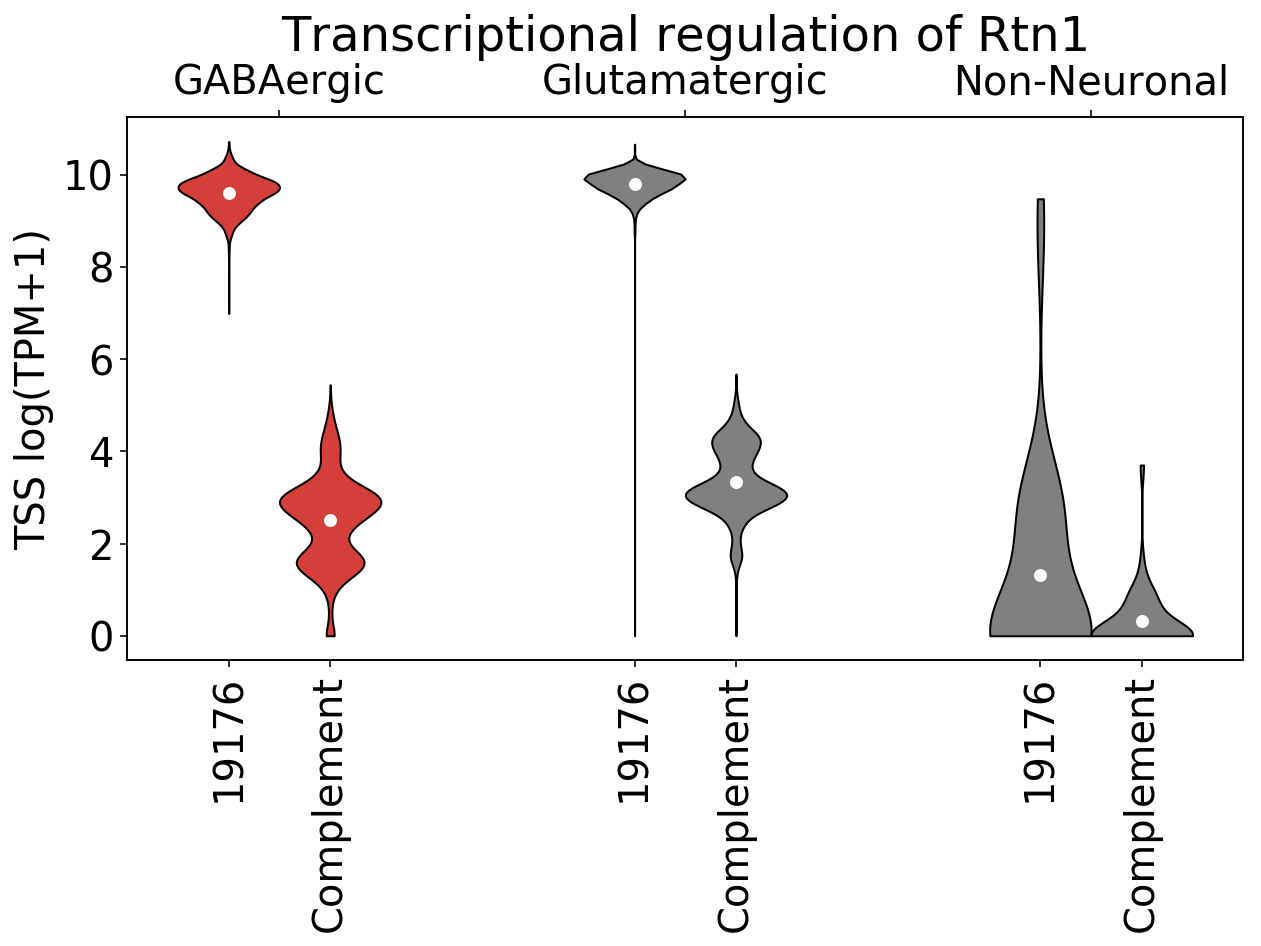

In [85]:
fig, ax = plt.subplots(figsize=(10,5))

unique = np.unique(gene.obs.class_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))

midx = np.where(unique==specific_cluster)[0][0]
labels = unique
lidx = np.arange(0.25, len(labels)*2+0.25, 2)
ridx = np.arange(0.75, len(labels)*2 + 0.75, 2)
cidx = np.arange(0.50, len(labels)*2+0.5, 2)


lridx = np.union1d(lidx, ridx)
sub_labels = [tss_0, "Complement"]*len(lidx)

mat = stss.layers["log1p"].todense()
obs = stss.obs
var = stss.var



x = []
y = []
for c in unique:
    tmp_mat = mat[obs.class_label==c,:]
    
    x.append(np.asarray(tmp_mat[:,var.tss_class==tss_0]).reshape(-1).tolist())
    tmp = []
    for t in tss_1:
        tmp.append(np.asarray(tmp_mat[:,var.tss_class==t]).reshape(-1).tolist())
    y.append(np.array(tmp).mean(axis=0))
    #y.append(np.asarray(tmp_mat[:,var.tss_class==tss_1]).reshape(-1).tolist())
    
left = ax.violinplot(x, showmedians=False, showextrema=False, positions=lidx)
right = ax.violinplot(y, showmedians=False, showextrema=False, positions=ridx)
for pcidx, pc in enumerate(left['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')
        
for pcidx, pc in enumerate(right['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')

medians = [np.mean(i) for i in x]
ax.scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

medians = [np.mean(i) for i in y]
ax.scatter(ridx, medians, marker='o', color='white', s=30, zorder=3)

ax2 = ax.twiny()
ax.set_xticks(lridx)
ax.set_xticklabels(sub_labels, rotation=90, ha="center")

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(cidx)
ax2.set_xticklabels(labels, rotation=0, ha="center")

ax.set_ylabel("TSS log(TPM+1)")
ax.set_title("Transcriptional regulation of {}".format(specific_gene.split("_")[0]))

plt.savefig("./figures/tss_DE_tssviolin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight', dpi=300)

plt.show()

In [81]:
et2g[et2g.tss_class==19176]

,chromosome,gene_id,new_start,tss_same,tss_len,n_tss_same,n_iso,max_tss_size,num_tss_1_iso,tss_class,gene_name,tss_same_name,filter
19176,12,ENSMUSG00000021087,72236724,"[ENSMUST00000021497, ENSMUST00000137990]",2,2,6,2,4,19176,Rtn1_ENSMUSG00000021087,Rtn1-201_ENSMUST00000021497,0
19176,12,ENSMUSG00000021087,72236724,"[ENSMUST00000021497, ENSMUST00000137990]",2,2,6,2,4,19176,Rtn1_ENSMUSG00000021087,Rtn1-203_ENSMUST00000137990,0


In [82]:
iso0, iso1 = "Rtn1-201_ENSMUST00000021497", "Rtn1-203_ENSMUST00000137990"

01-Mar-20 18:00:10 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:11 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos
01-Mar-20 18:00:12 - update_title_pos


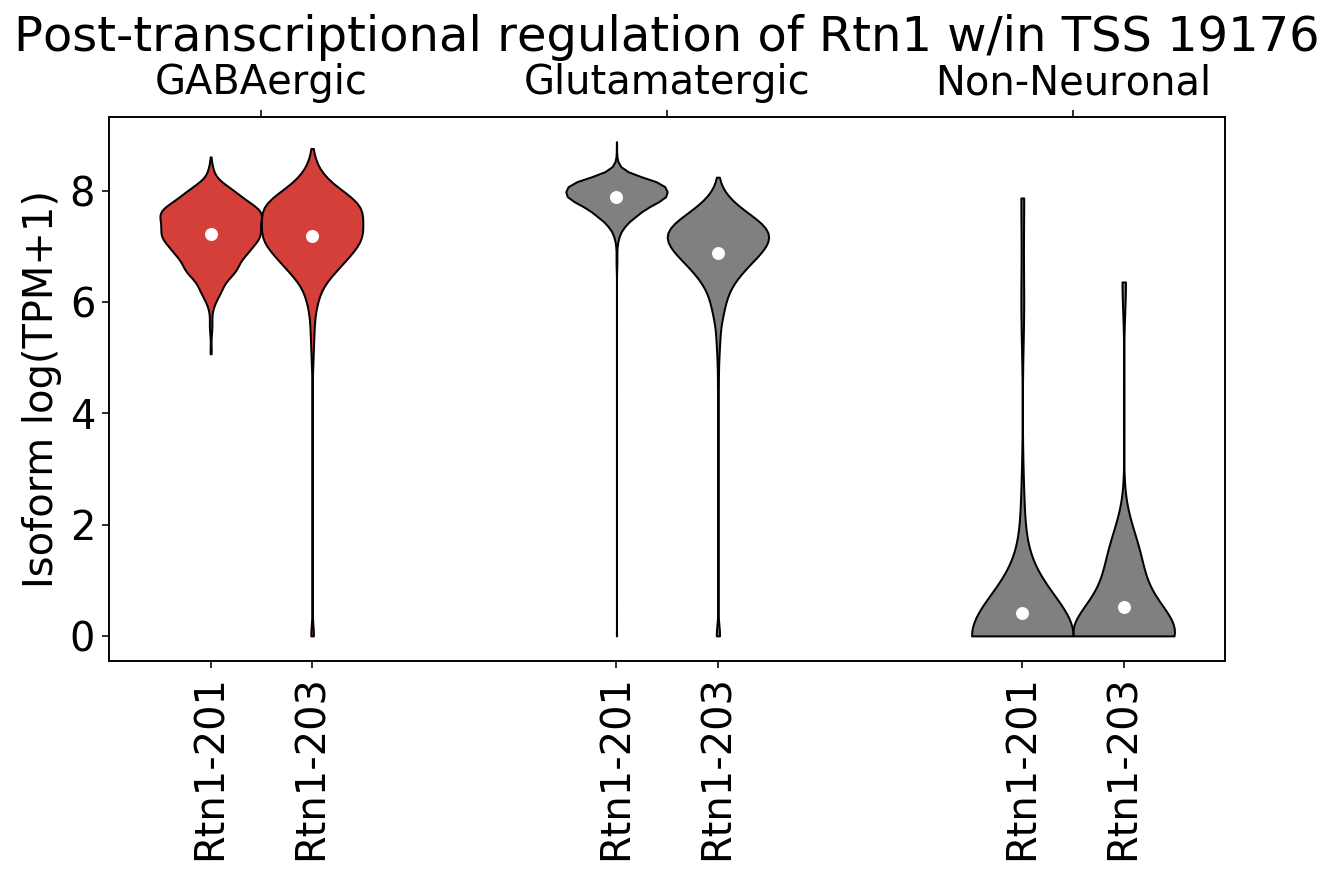

In [86]:
fig, ax = plt.subplots(figsize=(10,5))

unique = np.unique(stss.obs.class_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))

midx = np.where(unique==specific_cluster)[0][0]
labels = unique


lidx = np.arange(0.25, len(labels)*2+0.25, 2)
ridx = np.arange(0.75, len(labels)*2 + 0.75, 2)
cidx = np.arange(0.50, len(labels)*2+0.5, 2)

lridx = np.union1d(lidx, ridx)
sub_labels = [iso0.split("_")[0], iso1.split("_")[0]]*len(lidx)

mat = tmp_iso.layers["log1p"].todense()
obs = tmp_iso.obs
var = tmp_iso.var



x = []
y = []
for c in unique:
    tmp_mat = mat[obs.class_label==c,:]
    
    x.append(np.asarray(tmp_mat[:,var.transcript_name==iso0]).reshape(-1).tolist())
    y.append(np.asarray(tmp_mat[:,var.transcript_name==iso1]).reshape(-1).tolist())
    
left = ax.violinplot(x, showmedians=False, showextrema=False, positions=lidx)
right = ax.violinplot(y, showmedians=False, showextrema=False, positions=ridx)
for pcidx, pc in enumerate(left['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')
        
for pcidx, pc in enumerate(right['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')

medians = [np.mean(i) for i in x]
ax.scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

medians = [np.mean(i) for i in y]
ax.scatter(ridx, medians, marker='o', color='white', s=30, zorder=3)

ax2 = ax.twiny()
ax.set_xticks(lridx)
ax.set_xticklabels(sub_labels, rotation=90, ha="center")

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(cidx)
ax2.set_xticklabels(labels, rotation=0, ha="center")

ax.set_ylabel("Isoform log(TPM+1)")
ax.set_title("Post-transcriptional regulation of {} w/in TSS {}".format(specific_gene.split("_")[0], tss_0))
plt.savefig("./figures/tss_DE_isoviolin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight', dpi=300)

plt.show()

In [87]:
markers_isoform

,tss_class,transcript_name,p_raw,p_bonferroni
GABAergic,"[62768, 19176, 92332, 19691, 74682, 27581, 92332]","[Rsrp1-201_ENSMUST00000078084, Rtn1-203_ENSMUS...","[6.767145739172305e-50, 1.746540366488533e-34,...","[7.750073657787082e-46, 2.0002253547209924e-30..."
Glutamatergic,"[19304, 957, 57078, 100099, 89213, 19304, 1003...","[Srsf5-202_ENSMUST00000110351, Clk1-210_ENSMUS...","[1.2779322546281462e-32, 4.317381284470363e-30...","[1.4635519146128845e-28, 4.944480916039683e-26..."
Low Quality,"[74597, 3309, 38966, 38968]","[Cpne9-201_ENSMUST00000041203, Dtl-201_ENSMUST...","[6.723260832746054e-08, 1.0135659374711181e-07...","[0.0007699814468702419, 0.001160786389888798, ..."
Non-Neuronal,[61362],[Prdx1-202_ENSMUST00000106470],[6.00364255899691e-08],[0.0006875671640691212]


In [88]:
identified_isoforms = markers_isoform["transcript_name"].explode().astype(str)
identified_isoforms = identified_isoforms[identified_isoforms!="nan"]

In [89]:
identified_tss = markers_isoform["tss_class"].explode()

In [90]:
print("{} isoforms from {} tss classes identified.".format(identified_isoforms.shape[0], identified_tss.nunique()))

29 isoforms from 26 tss classes identified.


In [91]:
markers_isoform.to_csv("tables/tss_DE.csv")